<a href="https://colab.research.google.com/github/a-njan-a/Twitter-rumor-detection-and-analysis/blob/main/Twitter_Rumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [ ]:
#Reading the csv file
dataset1 = pd.read_csv("/content/drive/MyDrive/VIT/project/sin/fake-news/train.csv", engine="python")

In [ ]:
dataset1.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# counting the number of missing values in the dataset
dataset1.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#Cleaning data
dataset1= dataset1.drop(['author'], axis=1)
dataset1= dataset1.drop(['id'], axis=1)
dataset1= dataset1.dropna()

In [ ]:
dataset1.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#Dataset is divided into dependent and independent variables
#x comprises of tweet and title and y consists of the label
x= dataset1.iloc[:,:-1].values
x_title= dataset1.iloc[:,:-2].values
x[0]
y= dataset1.iloc[:,-1].values
y[0]

1

In [ ]:
#Converting text to numerics and preserving them in a matrix
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5000)
mat_body= cv.fit_transform(x[:,1]).todense()

In [ ]:
mat_body

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 3, 0, ..., 0, 0, 0]])

In [ ]:
cv_head = CountVectorizer(max_features=5000)
mat_head = cv_head.fit_transform(x[:,0]).todense()

In [ ]:
mat_head

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_mat= np.hstack((mat_head, mat_body))

In [ ]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size= 0.2, random_state=42)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

In [ ]:
y_res= []
for i in range(100):
  if y_pred[i] == 0:
    y_res.append("Rumour")
  else:
    y_res.append("Not a Rumour")

for i in range(10):
  print(x_title[i]+' -> '+y_res[i])

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It -> Not a Rumour']
['FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart -> Not a Rumour']
['Why the Truth Might Get You Fired -> Rumour']
['15 Civilians Killed In Single US Airstrike Have Been Identified -> Not a Rumour']
['Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery -> Not a Rumour']
['Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart -> Rumour']
['Life: Life Of Luxury: Elton John’s 6 Favorite Shark Pictures To Stare At During Long, Transcontinental Flights -> Not a Rumour']
['Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times -> Not a Rumour']
['Excerpts From a Draft Script for Donald Trump’s Q&ampA With a Black Church’s Pastor - The New York Times -> Not a Rumour']
['A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associate

In [ ]:
#Confusion matrix is prepared
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1744,  345],
       [ 294, 1658]])

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    
  else:
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


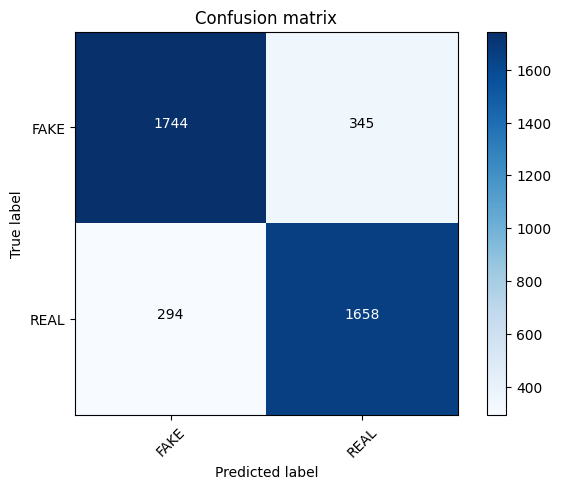

In [ ]:
#Plotting  the confusion matrix
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Calculating accuracy
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.8418708240534521

In [ ]:
#SVM - linear
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
y_res= []
for i in range(100):
  if y_pred[i] == 0:
    y_res.append("Rumour")
  else:
    y_res.append("Not a Rumour")

for i in range(10):
  print(x_title[i]+' -> '+y_res[i])

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It -> Not a Rumour']
['FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart -> Not a Rumour']
['Why the Truth Might Get You Fired -> Rumour']
['15 Civilians Killed In Single US Airstrike Have Been Identified -> Not a Rumour']
['Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery -> Rumour']
['Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart -> Rumour']
['Life: Life Of Luxury: Elton John’s 6 Favorite Shark Pictures To Stare At During Long, Transcontinental Flights -> Not a Rumour']
['Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times -> Not a Rumour']
['Excerpts From a Draft Script for Donald Trump’s Q&ampA With a Black Church’s Pastor - The New York Times -> Not a Rumour']
['A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - Th

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2031,   58],
       [  60, 1892]])

Confusion matrix, without normalization


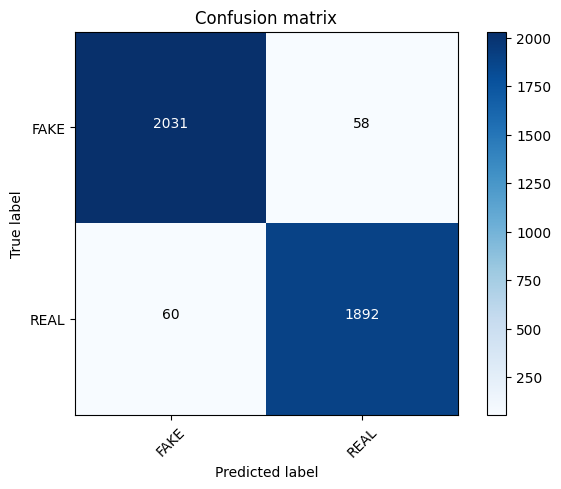

In [ ]:
#Plotting  the confusion matrix
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Calculating accuracy
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.9707993071022024

In [ ]:
#Decision Tree classifier is used to classify if its a rumor or not
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion= 'entropy')
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred= dtc.predict(x_test)
y_res= []
for i in range(100):
  if y_pred[i] == 0:
    y_res.append("Rumour")
  else:
    y_res.append("Not a Rumour")

for i in range(100):
  print(x_title[i]+' -> '+y_res[i])

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It -> Not a Rumour']
['FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart -> Not a Rumour']
['Why the Truth Might Get You Fired -> Rumour']
['15 Civilians Killed In Single US Airstrike Have Been Identified -> Not a Rumour']
['Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery -> Rumour']
['Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart -> Rumour']
['Life: Life Of Luxury: Elton John’s 6 Favorite Shark Pictures To Stare At During Long, Transcontinental Flights -> Not a Rumour']
['Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times -> Not a Rumour']
['Excerpts From a Draft Script for Donald Trump’s Q&ampA With a Black Church’s Pastor - The New York Times -> Not a Rumour']
['A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - Th

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Confusion matrix is prepared

cm = confusion_matrix(y_test, y_pred)
cm

array([[1996,   93],
       [  82, 1870]])

Confusion matrix, without normalization


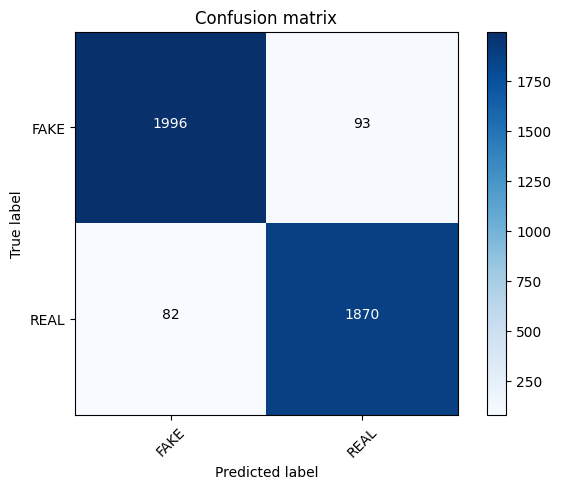

In [ ]:
#Plotting  the confusion matrix
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
#Calculating accuracy
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.9566938876515714

label
0    10387
1     9816
Name: text, dtype: int64


<Axes: xlabel='label'>

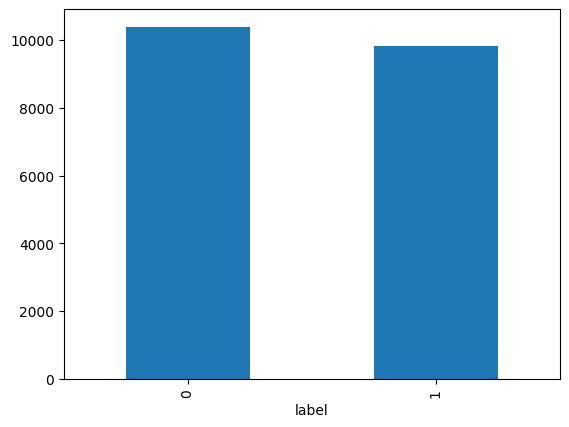

In [ ]:
#Analyzing the data
print(dataset1.groupby(['label'])['text'].count())
dataset1.groupby(['label'])['text'].count().plot(kind="bar")

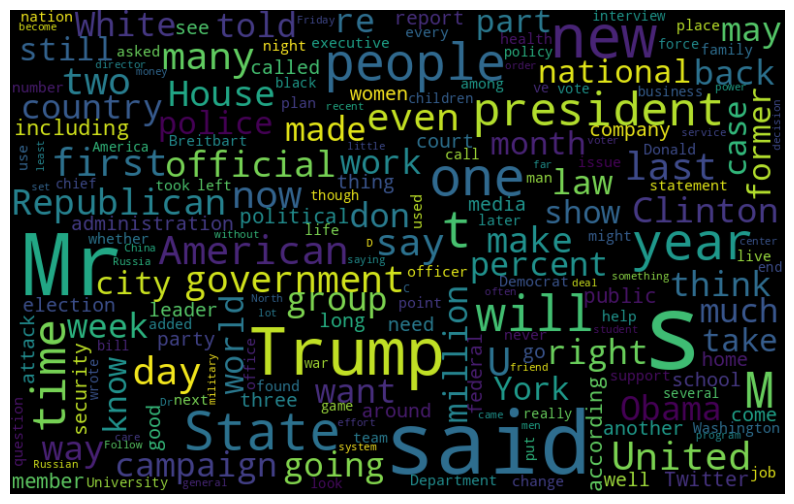

In [ ]:
#Wordcloud for fake data
fake_data = dataset1[dataset1["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
max_font_size = 110,
collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

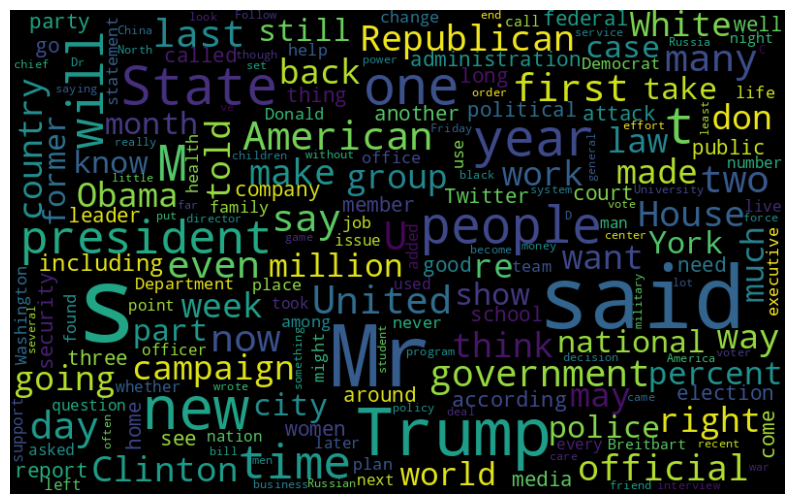

In [ ]:
#Wordcloud for real data
real_data = dataset1[dataset1["label"] == 1]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,
collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df = dataset1[dataset1['title'].notnull()]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['keyword'] = le.fit_transform(dataset1.title.values)

In [ ]:
df

,title,text,label,keyword
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,7593
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,5845
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,18666
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,143
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,8511
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,12888
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,10773
20797,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,9938
20798,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,10824


In [ ]:
#TSNE package is used for dimensionality reduction
X=df.iloc[:,-2:]
y = dataset1['label']

X
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values.reshape(-1,2))
X_reduced_tsne

array([[  25.7652   ,   66.66649  ],
       [  36.857388 ,   20.833359 ],
       [-104.817345 ,  -20.282076 ],
       ...,
       [   6.286563 ,   27.89416  ],
       [  -6.6894774,   46.53971  ],
       [ -88.63031  ,  -47.10088  ]], dtype=float32)

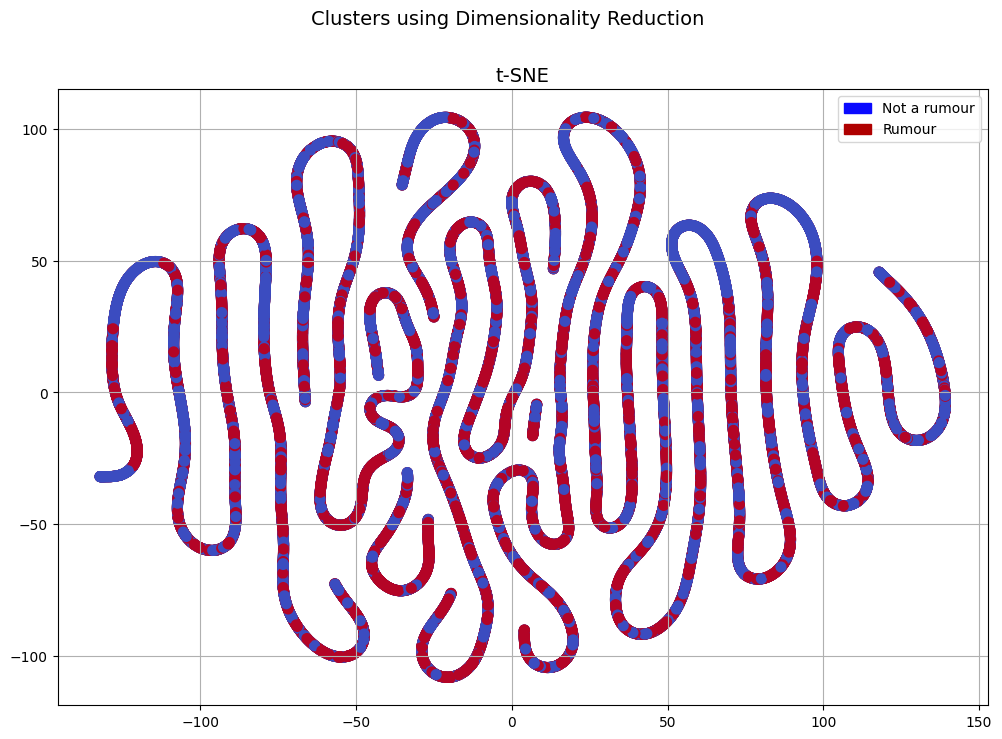

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='Not a rumour')
red_patch = mpatches.Patch(color='#AF0000', label='Rumour')
# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Not Fake',
linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Fake',
linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])
plt.show()

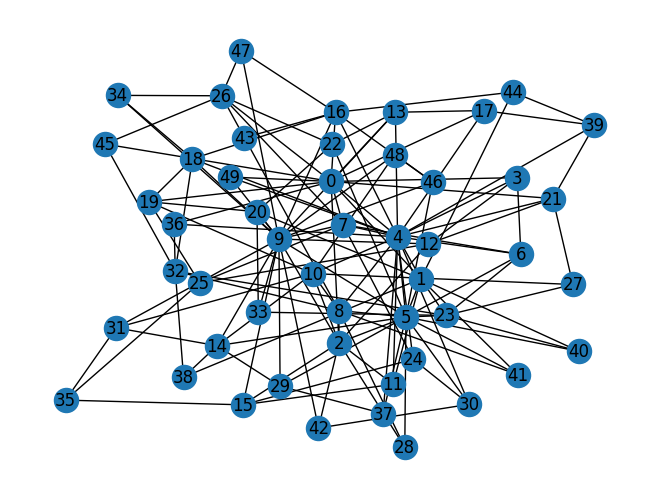

In [ ]:
#Barabasi Albert Graph is drawn from the cluster which tells about how the relation between the
#users spread the rumour
G= nx.barabasi_albert_graph(50,3)
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
  nodes = G.nodes()
  if in_degree:
    in_degree = dict(G.in_degree())
    degseq=[in_degree.get(k,0) for k in nodes]
    
  elif out_degree:
    out_degree = dict(G.out_degree())
    degseq=[out_degree.get(k,0) for k in nodes]
    
  else:
    degseq=[v for k, v in G.degree()]
  
  dmax=max(degseq)+1
  freq= [ 0 for d in range(dmax) ]
    
  for d in degseq:
    freq[d] += 1
      
  return freq

In [ ]:
G = nx.scale_free_graph(5000)

Text(0, 0.5, 'Frequency')

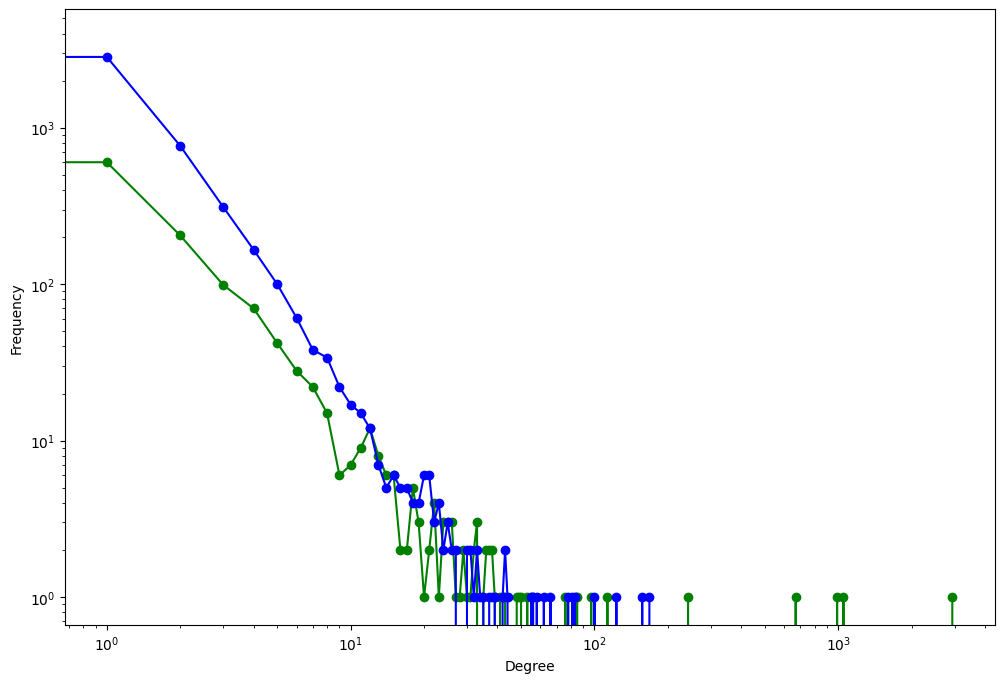

In [ ]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8))
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree')
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')